In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# setting the path of training dataset
DIRECTORY=r"My Dataset/train"
CATEGORIES=["Plain","Pothole"]

In [3]:

for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  count=0
  for img in os.listdir(folder):
    count+=1
  print(f"The {category} images are {count}")

print("----------------------------------")

labels = [i for i in range(len(CATEGORIES))]
labeldict={}
for i in range (len(CATEGORIES)):
    labeldict[CATEGORIES[i]]=labels[i]
print(labeldict)

The Plain images are 364
The Pothole images are 357
----------------------------------
{'Plain': 0, 'Pothole': 1}


`The difference between total Plain and Pothole images is very less(i.e 10) which can be neglected as there is no chance of`
`overfitting or underfitting`

In [49]:
# renaming image files in a folder
data=[]
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  count=1  
  label = CATEGORIES.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    count+=1
    dst=f"{category}{str(count)}.jpg"
    os.rename(img_path,dst)


In [50]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

datagen = ImageDataGenerator(
    rotation_range=5,
    shear_range=0.03,
    zoom_range=0.04,
    fill_mode='nearest'
)
# img = load_img('My Dataset/train/Pothole/Pothole2.jpg')
# img = load_img('My Dataset/train/Pothole/Pothole4.jpg')
# img = load_img('My Dataset/train/Plain/Plain345.jpg')
img = load_img('My Dataset/train/Plain/Plain239.jpg')


x = img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1,save_to_dir='My Dataset/train/Plain',save_prefix='Plaindatagen',save_format='JPEG'):
  i+=1
  if i>60:
    break

In [51]:
# after applying imagedata generator, the count of data has increased
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  count=0
  for img in os.listdir(folder):
    count+=1
  print(f"The {category} images are {count}")



The Plain images are 486
The Pothole images are 476


In [52]:
# Preparing the dataset
data=[]
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  # print(folder)
  label = CATEGORIES.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    # plt.imshow(img_arr)
    try:
        img_arr = cv2.resize(img_arr,(120,120))
        data.append([img_arr,label])
    except:
        print(img)

Plain150.jpg
Plain296.jpg


In [53]:
print(len(data))

960


Total number of data: 
Plain: 484
Pothole: 476


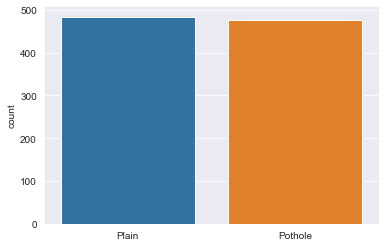

In [54]:
# Plotting the count of data 
list = []
countPlain=0
countPothole=0
for i in data:
    if(i[1] == 0):
        list.append("Plain")
        countPlain+=1
    else:
        list.append("Pothole")
        countPothole+=1
sns.set_style('darkgrid')
sns.countplot(list)
print(f"Total number of data: \nPlain: {countPlain}\nPothole: {countPothole}")
plt.show()

In [55]:
# shuffling the dataset, so that the model dont get overfit
random.shuffle(data)

In [56]:
print(data)

[[array([[[208, 181, 101],
        [209, 181, 104],
        [210, 181, 106],
        ...,
        [216, 196, 141],
        [215, 195, 140],
        [215, 195, 140]],

       [[208, 181, 104],
        [209, 182, 106],
        [209, 183, 109],
        ...,
        [213, 196, 145],
        [215, 197, 144],
        [213, 196, 144]],

       [[207, 182, 107],
        [208, 183, 110],
        [209, 184, 113],
        ...,
        [213, 198, 146],
        [212, 197, 147],
        [211, 197, 145]],

       ...,

       [[ 25,  23,  29],
        [ 23,  20,  27],
        [ 22,  19,  25],
        ...,
        [ 97,  62,   1],
        [ 96,  60,   0],
        [101,  64,   0]],

       [[ 23,  21,  27],
        [ 24,  20,  26],
        [ 19,  17,  20],
        ...,
        [ 99,  62,   0],
        [100,  63,   0],
        [100,  64,   0]],

       [[ 19,  15,  21],
        [ 17,  14,  16],
        [ 21,  15,  18],
        ...,
        [ 96,  61,   0],
        [100,  61,   0],
        [ 98,  61,   1

In [57]:
# Splitting the features and target, in X and Y
X=[]
Y=[]

for feature,labels in data:
    X.append(feature)
    Y.append(labels)

In [58]:
# printing the length of the X and Y data 
print(f"length of X : {len(X)}\nlength of Y : {len(Y)}")

length of X : 960
length of Y : 960


In [59]:
# Converting the X and Y values to numpy array
X=np.array(X)
Y=np.array(Y)

In [60]:
# reshaping X and Y
X=X/255
X=np.reshape(X,(X.shape[0],120,120,3))
print(X[0])

from keras.utils import np_utils
Y=np_utils.to_categorical(Y)
print(Y[0])

[[[0.81568627 0.70980392 0.39607843]
  [0.81960784 0.70980392 0.40784314]
  [0.82352941 0.70980392 0.41568627]
  ...
  [0.84705882 0.76862745 0.55294118]
  [0.84313725 0.76470588 0.54901961]
  [0.84313725 0.76470588 0.54901961]]

 [[0.81568627 0.70980392 0.40784314]
  [0.81960784 0.71372549 0.41568627]
  [0.81960784 0.71764706 0.42745098]
  ...
  [0.83529412 0.76862745 0.56862745]
  [0.84313725 0.77254902 0.56470588]
  [0.83529412 0.76862745 0.56470588]]

 [[0.81176471 0.71372549 0.41960784]
  [0.81568627 0.71764706 0.43137255]
  [0.81960784 0.72156863 0.44313725]
  ...
  [0.83529412 0.77647059 0.57254902]
  [0.83137255 0.77254902 0.57647059]
  [0.82745098 0.77254902 0.56862745]]

 ...

 [[0.09803922 0.09019608 0.11372549]
  [0.09019608 0.07843137 0.10588235]
  [0.08627451 0.0745098  0.09803922]
  ...
  [0.38039216 0.24313725 0.00392157]
  [0.37647059 0.23529412 0.        ]
  [0.39607843 0.25098039 0.        ]]

 [[0.09019608 0.08235294 0.10588235]
  [0.09411765 0.07843137 0.10196078]


In [61]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [62]:
X.shape[1:]

(120, 120, 3)

## Creating Cnn-Architecture and Modelling the data

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation

In [89]:
# creating cnn model 
modell=Sequential()


modell.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
modell.add(Activation('relu'))
modell.add(MaxPooling2D(pool_size=(2,2)))
modell.add(Dropout(0.5))

modell.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
modell.add(Activation('relu'))
modell.add(MaxPooling2D(pool_size=(2,2)))
modell.add(Dropout(0.5)) 

modell.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
modell.add(Activation('relu'))
modell.add(MaxPooling2D(pool_size=(2,2)))
modell.add(Dropout(0.5))

modell.add(Conv2D(64,(3,3)))
modell.add(Activation('relu'))
modell.add(MaxPooling2D(pool_size=(2,2)))
modell.add(Dropout(0.5))

modell.add(Conv2D(64,(3,3)))
modell.add(Activation('relu'))
modell.add(MaxPooling2D(pool_size=(2,2)))
modell.add(Dropout(0.5))


modell.add(Flatten())

modell.add(Dense(128,activation='relu'))
modell.add(Dropout(0.5))
modell.add(Dense(2,activation='softmax'))

modell.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
modell.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
activation_53 (Activation)   (None, 118, 118, 32)      0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 57, 57, 32)        9248      
_________________________________________________________________
activation_54 (Activation)   (None, 57, 57, 32)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 28, 28, 32)      

In [85]:
# splitting the data into train and test using train test split 
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(X,Y,test_size=0.2)

In [86]:
print(f'train data : {len(train_data)}\ntest data : {len(test_data)}')

train data : 768
test data : 192


In [87]:
# fitting the training data into model
history=modell.fit(train_data,train_target,epochs=40,validation_split=0.1,verbose=1)

Epoch 1/40
22/22 [==============================] - 8s 317ms/step - loss: 0.7558 - accuracy: 0.5109 - val_loss: 0.6931 - val_accuracy: 0.5195
Epoch 2/40
22/22 [==============================] - 6s 273ms/step - loss: 0.6947 - accuracy: 0.4877 - val_loss: 0.6927 - val_accuracy: 0.5325
Epoch 3/40
22/22 [==============================] - 6s 266ms/step - loss: 0.6962 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5325
Epoch 4/40
22/22 [==============================] - 6s 276ms/step - loss: 0.6899 - accuracy: 0.5398 - val_loss: 0.6922 - val_accuracy: 0.5325
Epoch 5/40
22/22 [==============================] - 6s 273ms/step - loss: 0.6903 - accuracy: 0.5253 - val_loss: 0.6920 - val_accuracy: 0.5325
Epoch 6/40
22/22 [==============================] - 6s 270ms/step - loss: 0.6830 - accuracy: 0.5658 - val_loss: 0.6904 - val_accuracy: 0.5584
Epoch 7/40
22/22 [==============================] - 6s 271ms/step - loss: 0.6754 - accuracy: 0.5876 - val_loss: 0.6868 - val_accuracy: 0.5584
Epoch 

In [27]:
history1=model.fit(train_data,train_target,epochs=70,validation_split=0.2,verbose=1)

Epoch 1/70
20/20 [==============================] - 7s 318ms/step - loss: 0.0285 - accuracy: 0.9886 - val_loss: 0.0098 - val_accuracy: 0.9935
Epoch 2/70
20/20 [==============================] - 6s 283ms/step - loss: 0.0324 - accuracy: 0.9886 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3/70
20/20 [==============================] - 6s 290ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/70
20/20 [==============================] - 6s 293ms/step - loss: 0.0240 - accuracy: 0.9935 - val_loss: 0.0357 - val_accuracy: 0.9870
Epoch 5/70
20/20 [==============================] - 6s 280ms/step - loss: 0.0380 - accuracy: 0.9788 - val_loss: 0.0221 - val_accuracy: 0.9935
Epoch 6/70
20/20 [==============================] - 6s 296ms/step - loss: 0.1442 - accuracy: 0.9495 - val_loss: 0.0675 - val_accuracy: 0.9675
Epoch 7/70
20/20 [==============================] - 8s 416ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0289 - val_accuracy: 0.9870
Epoch 

In [31]:
history2=model.fit(train_data,train_target,epochs=70,validation_split=0.2,verbose=1)

Epoch 1/70
20/20 [==============================] - 11s 471ms/step - loss: 0.7481 - accuracy: 0.5489 - val_loss: 0.6910 - val_accuracy: 0.5519
Epoch 2/70
20/20 [==============================] - 9s 450ms/step - loss: 0.6427 - accuracy: 0.6221 - val_loss: 0.6763 - val_accuracy: 0.6558
Epoch 3/70
20/20 [==============================] - 9s 458ms/step - loss: 0.5985 - accuracy: 0.6515 - val_loss: 0.6593 - val_accuracy: 0.7468
Epoch 4/70
20/20 [==============================] - 9s 458ms/step - loss: 0.5388 - accuracy: 0.7524 - val_loss: 0.5983 - val_accuracy: 0.8312
Epoch 5/70
20/20 [==============================] - 9s 448ms/step - loss: 0.4766 - accuracy: 0.7915 - val_loss: 0.5798 - val_accuracy: 0.8312
Epoch 6/70
20/20 [==============================] - 9s 443ms/step - loss: 0.4554 - accuracy: 0.8046 - val_loss: 0.5171 - val_accuracy: 0.8766
Epoch 7/70
20/20 [==============================] - 9s 443ms/step - loss: 0.4059 - accuracy: 0.8094 - val_loss: 0.4876 - val_accuracy: 0.8312
Epoch

In [40]:
history4=model.fit(train_data,train_target,epochs=60,validation_split=0.2,verbose=1)

Epoch 1/60
20/20 [==============================] - 9s 462ms/step - loss: 0.7000 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5065
Epoch 2/60
20/20 [==============================] - 9s 426ms/step - loss: 0.6841 - accuracy: 0.5831 - val_loss: 0.6930 - val_accuracy: 0.5130
Epoch 3/60
20/20 [==============================] - 9s 432ms/step - loss: 0.6885 - accuracy: 0.5244 - val_loss: 0.6930 - val_accuracy: 0.5065
Epoch 4/60
20/20 [==============================] - 9s 438ms/step - loss: 0.6850 - accuracy: 0.5407 - val_loss: 0.6928 - val_accuracy: 0.5065
Epoch 5/60
20/20 [==============================] - 8s 413ms/step - loss: 0.6716 - accuracy: 0.5603 - val_loss: 0.6933 - val_accuracy: 0.5065
Epoch 6/60
20/20 [==============================] - 8s 412ms/step - loss: 0.6433 - accuracy: 0.6433 - val_loss: 0.6732 - val_accuracy: 0.6039
Epoch 7/60
20/20 [==============================] - 8s 410ms/step - loss: 0.5138 - accuracy: 0.7590 - val_loss: 0.5886 - val_accuracy: 0.7532
Epoch 

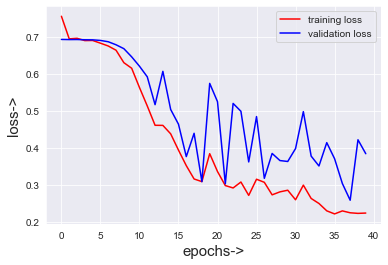

In [88]:
# plotting the line of training loss
plt.plot(history.history['loss'],'red',label='training loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.xlabel("epochs->",size=15)
plt.ylabel("loss->",size=15)
plt.legend()
plt.show()

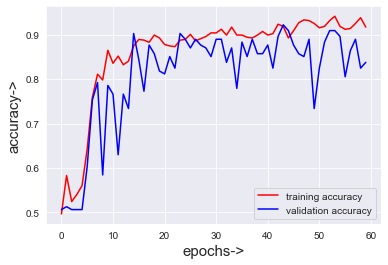

In [43]:
# plotting the line of training accuracy
plt.plot(history4.history['accuracy'],'red',label='training accuracy')
plt.plot(history4.history['val_accuracy'],'blue',label='validation accuracy')
plt.xlabel("epochs->",size=15)
plt.ylabel("accuracy->",size=15)
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target,verbose=1))